In [0]:
!pip install keras

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint, TensorBoard
import os
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D

import matplotlib.pyplot as plt



In [0]:
####  ROAD TYPE +  VANISHING POINT DATASETS #################

X_train=np.load('datasets/yeni/x_train_RT_CUT.npy')
X_test=np.load('datasets/yeni/x_test_RT_CUT.npy')
Y_train=np.load('datasets/yeni/y_train_RT_CUT.npy')
Y_test=np.load('datasets/yeni/y_test_RT_CUT.npy')


Dataset shape: (512, 128, 128, 3)
512 sample, 128 x 128 3  size color image.

Examples:


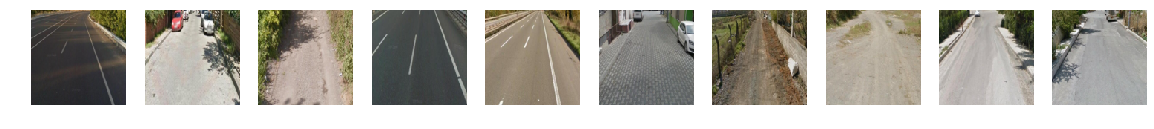

In [0]:
img_size = X_train.shape[1] # 64
channel_size = X_train.shape[3] # 1: Grayscale, 3: RGB

print('Dataset shape:', X_train.shape)
print(X_train.shape[0], 'sample,',X_train.shape[1] ,'x',X_train.shape[2], 'x', channel_size, ' size color image.\n')

print('Examples:')
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    # Display data:
    ax = plt.subplot(1, n, i)
    plt.imshow(X_train[np.random.randint(0, X_train.shape[0], 1)].reshape(img_size, img_size, channel_size))
    plt.axis('off')

Dataset shape: (128, 128, 128, 3)
128 sample, 128 x 128 x 3  size color image.

Examples:


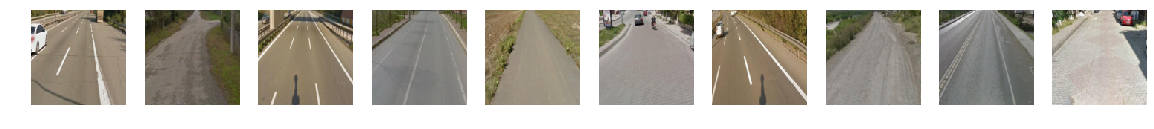

In [0]:
img_size = X_test.shape[1] # 64
channel_size = X_test.shape[3] # 1: Grayscale, 3: RGB

print('Dataset shape:', X_test.shape)
print(X_test.shape[0], 'sample,',X_test.shape[1] ,'x',X_test.shape[2], 'x', channel_size, ' size color image.\n')

print('Examples:')
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    # Display data:
    ax = plt.subplot(1, n, i)
    plt.imshow(X_test[np.random.randint(0, X_test.shape[0], 1)].reshape(img_size, img_size, channel_size))
    plt.axis('off')

In [0]:
from Model1 import our_1
model = our_1()

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
__________

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), 
              metrics=['accuracy'])
datagen = ImageDataGenerator(width_shift_range=0,vertical_flip=False)

train_generator = datagen.flow(X_train, Y_train, batch_size=64)

foldername="RT_VP_our1"
filename="/epoch-{epoch:02d}-val-acc-{val_acc:.4f}.hdf5"

checkpoints = []

if not os.path.exists(foldername):
    os.makedirs(foldername)

checkpoints.append(ModelCheckpoint(foldername+filename, 
                                   monitor='val_acc', 
                                   verbose=1, 
                                   save_best_only=True, 
                                   save_weights_only=True, 
                                   mode='auto', 
                                   period=1))

checkpoints.append(TensorBoard(log_dir=foldername+'/TensorBoardLogs', 
                               histogram_freq=0, 
                               write_graph=True, 
                               write_images=False, 
                               embeddings_freq=0, 
                               embeddings_layer_names=None, 
                               embeddings_metadata=None))




In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
# TRAINING THE MODEL
model.fit_generator(train_generator, 
                    steps_per_epoch=440//32, 
                    epochs=100, 
                    validation_data=(X_test, Y_test),
                    validation_steps=110//32,
                    callbacks=checkpoints)

Epoch 1/100
13/13 [==============================] - 3s 200ms/step - loss: 1.6036 - acc: 0.2308 - val_loss: 1.5451 - val_acc: 0.5156

Epoch 00001: val_acc improved from -inf to 0.51562, saving model to yeni_our1/epoch-01-val-acc-0.5156.hdf5
Epoch 2/100
13/13 [==============================] - 1s 96ms/step - loss: 1.4922 - acc: 0.3413 - val_loss: 1.2751 - val_acc: 0.4062

Epoch 00002: val_acc did not improve
Epoch 3/100
13/13 [==============================] - 1s 94ms/step - loss: 1.3060 - acc: 0.4279 - val_loss: 1.1369 - val_acc: 0.5547

Epoch 00003: val_acc improved from 0.51562 to 0.55469, saving model to yeni_our1/epoch-03-val-acc-0.5547.hdf5
Epoch 4/100
13/13 [==============================] - 1s 96ms/step - loss: 1.1559 - acc: 0.5144 - val_loss: 0.9975 - val_acc: 0.6250

Epoch 00004: val_acc improved from 0.55469 to 0.62500, saving model to yeni_our1/epoch-04-val-acc-0.6250.hdf5
Epoch 5/100
13/13 [==============================] - 1s 96ms/step - loss: 1.0168 - acc: 0.5841 - val_lo

 1/13 [=>............................] - ETA: 1s - loss: 0.0090 - acc: 1.000013/13 [==============================] - 1s 95ms/step - loss: 0.0526 - acc: 0.9868 - val_loss: 0.5063 - val_acc: 0.8906

Epoch 00043: val_acc did not improve
Epoch 44/100
13/13 [==============================] - 1s 95ms/step - loss: 0.1616 - acc: 0.9519 - val_loss: 1.1510 - val_acc: 0.7891

Epoch 00044: val_acc did not improve
Epoch 45/100
13/13 [==============================] - 1s 95ms/step - loss: 0.3240 - acc: 0.8870 - val_loss: 1.2753 - val_acc: 0.7109

Epoch 00045: val_acc did not improve
Epoch 46/100
13/13 [==============================] - 1s 95ms/step - loss: 0.2136 - acc: 0.9207 - val_loss: 0.7299 - val_acc: 0.8047

Epoch 00046: val_acc did not improve
Epoch 47/100
13/13 [==============================] - 1s 95ms/step - loss: 0.0779 - acc: 0.9784 - val_loss: 0.4969 - val_acc: 0.8828

Epoch 00047: val_acc did not improve
Epoch 48/100
13/13 [==============================] - 1s 93ms/step - loss: 0.0154


Epoch 00096: val_acc did not improve
Epoch 97/100
13/13 [==============================] - 1s 95ms/step - loss: 2.9914e-05 - acc: 1.0000 - val_loss: 0.7819 - val_acc: 0.8984

Epoch 00097: val_acc did not improve
Epoch 98/100
13/13 [==============================] - 1s 96ms/step - loss: 3.2236e-05 - acc: 1.0000 - val_loss: 0.7826 - val_acc: 0.8984

Epoch 00098: val_acc did not improve
Epoch 99/100
13/13 [==============================] - 1s 97ms/step - loss: 2.7415e-05 - acc: 1.0000 - val_loss: 0.7817 - val_acc: 0.8984

Epoch 00099: val_acc did not improve
Epoch 100/100
13/13 [==============================] - 1s 93ms/step - loss: 2.7645e-05 - acc: 1.0000 - val_loss: 0.7850 - val_acc: 0.8984

Epoch 00100: val_acc did not improve


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
model.load_weights("RT_VP_our_1/epoch-24-val-acc-0.9141.hdf5")
x_test = np.load('datasets/yeni/x_test_RT_CUT.npy')
y_test = np.load('datasets/yeni/y_test_RT_CUT.npy')

In [0]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

In [0]:
testPredict = model.predict(x_test)

In [0]:
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

[[23  0  1  0  0]
 [ 1 24  0  0  0]
 [ 3  0 19  1  1]
 [ 2  0  0 23  0]
 [ 0  0  1  1 28]]
